Please upload:


*   ode_const_20_multiclass_reg_x_train.npy
*   ode_const_20_multiclass_reg_x_val.npy
*   ode_const_20_multiclass_reg_y_train.npy
*   ode_const_20_multiclass_reg_y_val.npy



# Import Libraries

comments:
1. Add relu, dropout, subsamling?, conv?, bidirectional
2. Compare to standard nets
3. For i in range(samples_per_epoch)
4. Add recurent layer after ode

In [1]:
import numpy as np
import random

import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader, random_split, TensorDataset

import torch.optim as optim
import torch.nn as nn

from sklearn.model_selection import train_test_split

from torchdiffeq import odeint_adjoint as odeint

import os

In [2]:
###################
##    BOA EDIT
###################

# LOAD DATASET
data = np.load('data_.npy',allow_pickle=True)
labels = np.load('labels_.npy',allow_pickle=True)

for i in range(len(labels)):
    # l = str(labels[i])# take the label 
    labels[i] = labels[i]

# fl = 5 in labels

# EPS = 1


# NORMALIZE TIMES
def relu(x):
    if x<0:
        return 0
    else:
        return x

for i in data:
    t = i[1].copy()
    f = lambda x: x - t[0]
    i[1] = np.array(list(map(f,i[1]))) #np.pad(np.diff(i[1]),(1,0),'constant', constant_values=[0,0])
    
    if (np.any(i[1]<0)):
        i[1] = np.array(list(map(relu,i[1])))


# GETTING RID OF EQUAL ENTERIES 
fil = []
for i in data:
    if np.any(np.diff(i[1]) == 0):
        fil.append(False)
    else:
        fil.append(True)
data = data[fil]
labels = labels [fil]

# SPLIT TO TRAIN TEST 
data_train , data_val , y_train , y_val = train_test_split(data,labels,shuffle=True,stratify=labels,train_size=0.8)




# CLASSES
classes = np.ndarray.tolist(np.unique(labels))
classes.sort()
classes

y_train = np.array([classes.index(i) for i in y_train])
y_val = np.array([classes.index(i) for i in y_val])

classes = list(range(len(classes)))




# MAKING TIME SERIES STRICTLY INCREASING 
# for i in range(1,len(data)):
#     data[i][1] += (data[i-1][1][19] + EPS)
#     pass







In [3]:
sum([len(y_val[y_val==i]) for i in range(len(classes))])

90501

# Define Parameters

In [4]:
epochs = 100

samples_per_epoch = 1000
batch_size = 32  ###########################
# learning_rate = 1e-4

learning_rate = 0.01
device = torch.device("cpu")

num_classes = len(classes) #5
class_names = classes #["VoIP", "Video", "File_Transfer", "Chat", "Browsing"]

seq_size = 20
input_dim = 1
bidirectional = False
lstm_num_layers = 2 # layer should be changed 

tol = 1e-3
ode_hidden_dim = 32

MODEL_NAME = "ORDER_ode_const_20_multiclass_reg"
PATH_PREFIX = "ode_const_20_multiclass_"

# Import Train and Validation Data

In [5]:
##########################################
###     SKIP THIS BLOCK TO TEST BOA 
##########################################

# data_train = np.load(PATH_PREFIX + "reg_x_train.npy")
# y_train = np.load(PATH_PREFIX + "reg_y_train.npy")
# data_val = np.load(PATH_PREFIX + "reg_x_val.npy")
# y_val = np.load(PATH_PREFIX + "reg_y_val.npy")


# print(data_train.shape, y_train.shape)
# print(data_val.shape, y_val.shape)

In [6]:
#######################################
##      RESEARCH ORIGINAL DATA
#######################################
# np.ndarray.tolist(data_train[:,1,:])

In [7]:
##########################################
###     SKIP THIS BLOCK TO TEST BOA 
##########################################

# from sklearn.utils import shuffle
# data_train, y_train = shuffle(data_train, y_train)
# data_val, y_val = shuffle(data_val, y_val)

# print(y_val[:100])
y_train==i

c:\Users\Itay\.conda\envs\envi\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


False

## Generate duration statistics

In [8]:
# partonne = data_train[:,1,-1]
# parttwo = data_train[:,1,0]
# data_train_durations = data_train[:,1,-1] - data_train[:,1,0]
data_train_durations = []
for i in data_train:
  data_train_durations.append(i[1][-1].copy()-i[1][0].copy())
data_train_durations = np.array(data_train_durations)



for i in class_names:
  print(i, str(seq_size) + " packets" , 'regular', i, 'Avergae duration:', np.mean(data_train_durations[y_train==i]), 'Median duration:', np.median(data_train_durations[y_train==i]), 'Std duration:', np.std(data_train_durations[y_train==i]))

0 20 packets regular 0 Avergae duration: 1.589721883593493 Median duration: 0.013811111450195312 Std duration: 20.937039366050257
1 20 packets regular 1 Avergae duration: 6.106360639586593 Median duration: 1.1056585311889648 Std duration: 12.620365288062722
2 20 packets regular 2 Avergae duration: 14.602991599616912 Median duration: 0.37593603134155273 Std duration: 32.370003235049104
3 20 packets regular 3 Avergae duration: 34.47469600286925 Median duration: 1.1154578924179077 Std duration: 68.39537565720431
4 20 packets regular 4 Avergae duration: 80.34175028600099 Median duration: 45.55343008041382 Std duration: 90.51972982989352
5 20 packets regular 5 Avergae duration: 65.74106595345906 Median duration: 0.35633742809295654 Std duration: 87.89521279531671
6 20 packets regular 6 Avergae duration: 53.87599097974088 Median duration: 0.6085898876190186 Std duration: 86.12656255595776
7 20 packets regular 7 Avergae duration: 103.60241078819547 Median duration: 68.04351711273193 Std durat

In [9]:
for i in data_train:
    if np.any(np.diff(i[1]) == 0):
        j = i.numpy()
        pass

## Generate train and test sets

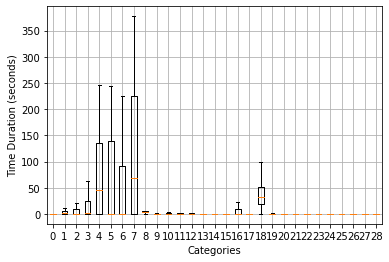

In [10]:
import matplotlib.pyplot as plt

plt.boxplot([data_train_durations[y_train==i] for i in classes], labels=class_names, showfliers=False)
plt.xlabel("Categories")
plt.ylabel("Time Duration (seconds)")
plt.grid()
plt.show()

In [11]:
# import seaborn as sns
# ax = sns.boxplot(data=[data_train_durations[y_train==i] for i in classes], showfliers=False)
# plt.xticks(np.arange(len(classes)), class_names)
# plt.xlabel("Categories")
# plt.ylabel("Time Duration (seconds)")
# plt.grid()
# plt.show()

In [12]:
# ax = sns.boxplot(data=[data_train_durations[y_train==i] for i in classes], showfliers=False)
# plt.xticks(np.arange(len(classes)), class_names)
# plt.xlabel("Categories")
# plt.ylabel("Time Duration (seconds)")
# plt.grid()
# plt.show()

In [13]:
x_train = torch.from_numpy(data_train[:,0,:].reshape((data_train.shape[0], data_train.shape[2], 1))).float()
t_train = torch.from_numpy(data_train[:,1,:]).float()

x_val = torch.from_numpy(data_val[:,0,:].reshape((data_val.shape[0], data_val.shape[2], 1))).float()
t_val = torch.from_numpy(data_val[:,1,:]).float()

y_train = torch.from_numpy(y_train).long()
y_val = torch.from_numpy(y_val).long()
                         
print(x_train.shape, t_train.shape, y_train.shape)
print(x_val.shape, t_val.shape, y_val.shape)

torch.Size([362004, 20, 1]) torch.Size([362004, 20]) torch.Size([362004])
torch.Size([90501, 20, 1]) torch.Size([90501, 20]) torch.Size([90501])


In [14]:
# t_train = data_train[:,1,:]
for j,i in enumerate(t_train):
    if np.any(np.diff(i) == 0):
        print("yes")
        break

yes


In [15]:
data_train[17][1]

array([0.        , 0.00025582, 0.00051689, 0.00076485, 0.00102305,
       0.00127196, 0.00152302, 0.00176382, 0.00203085, 0.00226283,
       0.00251293, 0.00297999, 0.002985  , 0.00321293, 0.00346184,
       0.00346589, 0.00405383, 0.00405884, 0.00429082, 0.00479484])

In [16]:
MTU = 1500
x_train = (x_train - MTU/2)/MTU
x_val = (x_val - MTU/2)/MTU
print(x_val[0:2])

tensor([[[ 0.4427],
         [ 0.4427],
         [ 1.3413],
         [ 0.4427],
         [ 0.4427],
         [ 0.4427],
         [ 1.3413],
         [ 1.3413],
         [ 0.4427],
         [ 0.4427],
         [ 0.4427],
         [ 1.3413],
         [ 1.3413],
         [ 0.4427],
         [ 1.3413],
         [ 0.4427],
         [ 1.3413],
         [ 1.3413],
         [ 1.3413],
         [ 0.4427]],

        [[-0.4560],
         [-0.4640],
         [-0.2293],
         [-0.4640],
         [-0.4033],
         [ 0.2753],
         [ 0.7873],
         [-0.4640],
         [ 0.2753],
         [-0.1407],
         [-0.4640],
         [ 0.2753],
         [-0.1407],
         [-0.4640],
         [ 0.2753],
         [-0.0553],
         [-0.4640],
         [ 0.2753],
         [-0.1407],
         [-0.4640]]])


In [17]:
m1 = 0
mask1 = []
for i, ts in enumerate(t_train):
    # t_= ts.numpy() > 0
    if np.any( np.diff(ts.numpy()) == 0):
        m1 += 1
    else:
        mask1.append(i)
        
m2 = 0
mask2 = []
for i, ts in enumerate(t_val):
    if np.any(np.diff(ts.numpy()) == 0):
        m2 += 1
    else:
        mask2.append(i)
        
print(m1, m2)

5527 1352


In [18]:
x_train, t_train, y_train = x_train[mask1], t_train[mask1], y_train[mask1]
x_val, t_val, y_val = x_val[mask2], t_val[mask2], y_val[mask2]

print(x_train.shape, t_train.shape, y_train.shape)
print(x_val.shape, t_val.shape, y_val.shape)

torch.Size([356477, 20, 1]) torch.Size([356477, 20]) torch.Size([356477])
torch.Size([89149, 20, 1]) torch.Size([89149, 20]) torch.Size([89149])


In [19]:
for i in t_train:
    if np.any(np.diff(i) == 0):
        j = i.numpy()
        pass

In [20]:
def check_for_None(x, t, y):
  for i in range(len(x)):
    if True in torch.isnan(x[i]):
      print(i, x[i])
    if True in torch.isnan(t[i]):
      print(i, t[i])
    if len(x[i]) != len(t[i]):
      print(i, x[i], t[i])
    if True in torch.isnan(y[i]):
      print(i, y[i])

check_for_None(x_train, t_train, y_train)
check_for_None(x_val, t_val, y_val)

In [21]:
train_set = TensorDataset(x_train, t_train, y_train)
test_set = TensorDataset(x_val, t_val, y_val)


## Define Loaders

In [22]:
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=1,drop_last=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=1,drop_last=True)

# Define Model

In [23]:
class ODEFunc(nn.Module):

    def __init__(self, input_dim, hidden_dim):
        super(ODEFunc, self).__init__()

        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, input_dim),
        )

        for m in self.net.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0, std=0.1)
                nn.init.constant_(m.bias, val=0)

    def forward(self, t, x):
        return self.net(x)

In [24]:
class LSTMClassifier(nn.Module):

    def __init__(self, input_dim, seq_size, hidden_dim, label_size, batch_size, bidirectional, num_layers, ode_func):
        super(LSTMClassifier, self).__init__()
        self.input_dim = input_dim
        self.seq_size = seq_size
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, bidirectional=bidirectional, batch_first=True)
        self.hidden = self.init_hidden()

        self.ode_func = ode_func

        dim_1=128 ##
        self.fc = nn.Linear(hidden_dim*seq_size, dim_1) #change it to 256 or 512
        if bidirectional:
            self.fc = nn.Linear(2*hidden_dim*seq_size, dim_1)
        dim_2=64  ##  
        self.fc2 = nn.Linear(dim_1, dim_2) 
        self.hidden2label = nn.Linear(dim_2, label_size)
        
        #self.ode_func = ode_func
        
        #self.fc = nn.Linear(hidden_dim*seq_size, 128)
        #if bidirectional:
        #    self.fc = nn.Linear(2*hidden_dim*seq_size, 128)
        #self.hidden2label = nn.Linear(128, label_size)
        

    def init_hidden(self):
        first_size = 1
        if self.bidirectional:
            first_size = 2
        h0 = Variable(torch.zeros(first_size*self.num_layers, self.batch_size, self.hidden_dim)).float()
        c0 = Variable(torch.zeros(first_size*self.num_layers, self.batch_size, self.hidden_dim)).float()
        return (h0, c0)

    def forward(self, x, t):
        lstm_out, self.hidden = self.lstm(x, self.hidden)
#         print(lstm_out.shape)
#         print(lstm_out.shape[1], lstm_out.shape[2], self.seq_size, self.hidden_dim)
#         print(lstm_out.shape, lstm_out[:,0,:].shape, t.shape)
        out = odeint(self.ode_func, lstm_out[:,0,:], t[0], rtol=tol, atol=tol)
#         print(out.shape)
        out = out.view(lstm_out.shape)
#         print(out.shape)
        out = out.contiguous().view(-1, lstm_out.shape[1]*lstm_out.shape[2])  #contiguous() ###TTS##
#         print(out.shape)
#         print(lstm_out.shape)
#         print(lstm_out.shape)
#         lstm_out = torch.squeeze(lstm_out)
#         print(lstm_out.shape)
        y = self.fc(out)
        y = F.relu(y)
        y = self.fc2(y) #added new layers
        y = F.relu(y)
        y = self.hidden2label(y)
#         print(y.shape)
        return y
    
    ## For Regular LSTM
    #def forward(self, x):
     #   lstm_out, self.hidden = self.lstm(x, self.hidden)
      #  lstm_out = torch.squeeze(lstm_out)
       # y = self.fc(lstm_out)
        #y = self.hidden2label(y)
        #return y

In [25]:
ode_func = ODEFunc(input_dim, ode_hidden_dim)
ode_func = ode_func.to(device)
if bidirectional:
    ode_func = ODEFunc(input_dim*2, ode_hidden_dim).to(device)
    
model = LSTMClassifier(input_dim, seq_size, input_dim, num_classes, batch_size, bidirectional, lstm_num_layers, ode_func).to(device)

# optimizer = optim.Adam(model.parameters(), lr=learning_rate)
def adjust_learning_rate(optimizer, epoch):
    lr = learning_rate * (0.1 ** (epoch // 10))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    return optimizer

optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss().to(device)

In [26]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(model)
print('Number of parameters: {}'.format(count_parameters(model)))

LSTMClassifier(
  (lstm): LSTM(1, 1, num_layers=2, batch_first=True)
  (ode_func): ODEFunc(
    (net): Sequential(
      (0): Linear(in_features=1, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=1, bias=True)
    )
  )
  (fc): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (hidden2label): Linear(in_features=64, out_features=29, bias=True)
)
Number of parameters: 12958


# Run model

## Define train and test functions

In [27]:
def train(model, device, train_loader, optimizer, loss_function, epoch):
    model = model.to(device)
    model.train()
    correct = 0
    for batch_idx, traindata in enumerate(train_loader):
        x, t, target = traindata
        x, t, target = x.to(device), t.to(device), target.to(device)
        optimizer.zero_grad()
        t_ = list(model.init_hidden())
        t_[0] = t_[0].to(device)
        t_[1] = t_[1].to(device)
        model.hidden = tuple(t_)
        # print(model.hidden)
        output = model(x, t)
        
        output = torch.reshape(output, (batch_size, num_classes)) ######
        # train accuracy
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
        ##

#         print(output.shape, target.shape)
        loss = loss_function(output, target)
#         if batch_idx == 0:
#             loss.backward(retain_graph=True)
#         else:
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0: #%10
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(target), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
    print('\nTrain set: Accuracy: {}/{} ({:.2f}%)\n'.format(
            correct, len(train_loader.dataset),100. * correct / len(train_loader.dataset)))
    train_acc=100. * correct / len(train_loader.dataset)
    return train_acc

def test(model, device, test_loader, loss_function):
    model = model.to(device)
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for x, t, target in test_loader:
            x, t, target = x.to(device), t.to(device), target.to(device)
            output = model(x, t)
            output = torch.reshape(output, (batch_size, num_classes)) #######
            test_loss += loss_function(output, target).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Test Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    test_acc=(100. * correct / len(test_loader.dataset))
    return test_loss,test_acc


In [28]:
TRAINED_BEFORE = False

In [29]:
for i in t_train[100:201]:
    h = i.numpy()
    if True in (np.diff(i.numpy()) == 0):
        print("helll na")

In [31]:
if not TRAINED_BEFORE:
  epoch_array=[]
  accuracy_array=[]
  train_accuracy_array=[]
  best_acc = 0
  #test_loss = 0
  patience,trials =100, 0
  for epoch in range(1, epochs + 1):
      adjust_learning_rate(optimizer, epoch)
      # train(model, device, train_loader, optimizer, loss_function, epoch)
      tr_acc=train(model, device, train_loader, optimizer, loss_function, epoch)
      loss,acc=test(model, device, test_loader, loss_function)
      
      epoch_array.append(epoch)
      accuracy_array.append(acc)
      train_accuracy_array.append(tr_acc)
      print(f'DEBUG pre accuracy {acc}, best accuracy {best_acc}')
      if (acc > best_acc):
          best_acc = acc
          torch.save(model.state_dict(), 'ORDER_40e_multiclass_ode.pth')
          print(f'Epoch {epoch} best model saved with accuracy: {best_acc}')
      else:
          trials += 1
          if trials >= patience:
              print(f'Early stopping on epoch {epoch}')
              break
      print(f'DEBUG post accuracy {acc}, best accuracy {best_acc}')

Train Epoch: 1 [0/356477 (0%)]	Loss: 2.313039
Train Epoch: 1 [3200/356477 (1%)]	Loss: 2.121557
Train Epoch: 1 [6400/356477 (2%)]	Loss: 2.364124
Train Epoch: 1 [9600/356477 (3%)]	Loss: 2.185861
Train Epoch: 1 [12800/356477 (4%)]	Loss: 2.230983
Train Epoch: 1 [16000/356477 (4%)]	Loss: 2.122367
Train Epoch: 1 [19200/356477 (5%)]	Loss: 2.147020
Train Epoch: 1 [22400/356477 (6%)]	Loss: 2.345606
Train Epoch: 1 [25600/356477 (7%)]	Loss: 2.108104
Train Epoch: 1 [28800/356477 (8%)]	Loss: 2.274638
Train Epoch: 1 [32000/356477 (9%)]	Loss: 2.401189
Train Epoch: 1 [35200/356477 (10%)]	Loss: 2.495678
Train Epoch: 1 [38400/356477 (11%)]	Loss: 2.436514
Train Epoch: 1 [41600/356477 (12%)]	Loss: 2.172808
Train Epoch: 1 [44800/356477 (13%)]	Loss: 2.479881
Train Epoch: 1 [48000/356477 (13%)]	Loss: 2.016791
Train Epoch: 1 [51200/356477 (14%)]	Loss: 2.243317
Train Epoch: 1 [54400/356477 (15%)]	Loss: 2.264485
Train Epoch: 1 [57600/356477 (16%)]	Loss: 2.374005
Train Epoch: 1 [60800/356477 (17%)]	Loss: 2.10400

KeyboardInterrupt: 

In [ ]:
if not TRAINED_BEFORE:
  print('The training is finished! Restoring the best model weights')

The training is finished! Restoring the best model weights


In [ ]:
model.load_state_dict(torch.load('ORDER_40e_multiclass_ode.pth'))
model.eval()

LSTMClassifier(
  (lstm): LSTM(1, 1, num_layers=2, batch_first=True)
  (ode_func): ODEFunc(
    (net): Sequential(
      (0): Linear(in_features=1, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=1, bias=True)
    )
  )
  (fc): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (hidden2label): Linear(in_features=64, out_features=7, bias=True)
)

In [ ]:
model.eval()

LSTMClassifier(
  (lstm): LSTM(1, 1, num_layers=2, batch_first=True)
  (ode_func): ODEFunc(
    (net): Sequential(
      (0): Linear(in_features=1, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=1, bias=True)
    )
  )
  (fc): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (hidden2label): Linear(in_features=64, out_features=7, bias=True)
)

### Plot history accuracy

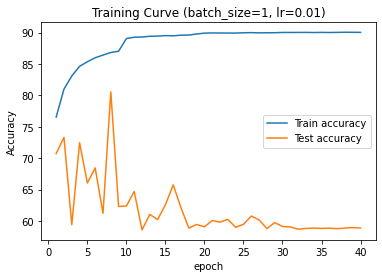

In [ ]:
import matplotlib.pyplot as plt

#epoch  = [] # save the iteration counts here for plotting
#Accuracy = [] # save the avg loss here for plotting
# save the current training information
#iters.append(n)
#losses.append(float(loss)/batch_size) # compute *average* loss
# plotting
if not TRAINED_BEFORE:
  plt.figure()
  plt.plot(epoch_array,train_accuracy_array,label = "Train accuracy")
  plt.plot(epoch_array,accuracy_array,label = "Test accuracy")
  plt.title("Training Curve (batch_size=1, lr=0.01)")
  plt.xlabel("epoch")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.savefig("graph_" + MODEL_NAME +  " accuracy history", bbox_inches='tight', pad_inches=1)
  #plt.savefig("drive/My Drive/Multiclass/tor/ode_const_50_multiclass_tor/ORDER_40e_multiclass_ode_accuracy_history.png")
  #files.download("drive/My Drive/Code-20200822T090227Z-001/Code/ode_const_10_voip_vs_all_reg/accuracy history new.png") 
  plt.show()

In [ ]:

def eval(model, device, test_loader, loss_function):
    model.eval()
    test_loss = 0
    correct = 0
    preds=[]
    true_labels=[]
    with torch.no_grad():
        for batch_idx,testdata in enumerate(test_loader):
            x,t,target=testdata
        #for x, t, target in test_loader:
            x, t, target = x.to(device), t.to(device), target.to(device)
            output = model(x, t)
            output = torch.reshape(output, (batch_size, num_classes)) ###########
            test_loss += loss_function(output, target).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            preds.append(pred)
            true_labels.append(target)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return preds,true_labels

preds,true_labels=eval(model, device, test_loader, loss_function)


Test set: Average loss: 0.6154, Accuracy: 4092/5079 (80.57%)



In [ ]:
t = np.stack([i.numpy().flatten() for i in true_labels])
p =  np.stack([i.numpy().flatten() for i in preds])
m = np.zeros((8,8))
for i in range(len(t)):
    m[t[i]][p[i]] += 1

print(m)
    

: 

: 

Confusion matrix, without normalization
[[   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   1   16 1011    2  358   32  160]
 [   0    0    0    7    2    0    1]
 [   4    6   34   33 2646   12   84]
 [   0    0   35    1   24  284   26]
 [   4    7   56   10   78    1  144]]


c:\Users\Itay\.conda\envs\envi\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  


Normalized confusion matrix
[[     nan      nan      nan      nan      nan      nan      nan]
 [     nan      nan      nan      nan      nan      nan      nan]
 [6.33e-04 1.01e-02 6.40e-01 1.27e-03 2.27e-01 2.03e-02 1.01e-01]
 [0.00e+00 0.00e+00 0.00e+00 7.00e-01 2.00e-01 0.00e+00 1.00e-01]
 [1.42e-03 2.13e-03 1.21e-02 1.17e-02 9.39e-01 4.26e-03 2.98e-02]
 [0.00e+00 0.00e+00 9.46e-02 2.70e-03 6.49e-02 7.68e-01 7.03e-02]
 [1.33e-02 2.33e-02 1.87e-01 3.33e-02 2.60e-01 3.33e-03 4.80e-01]]


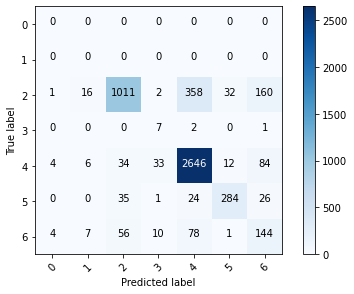

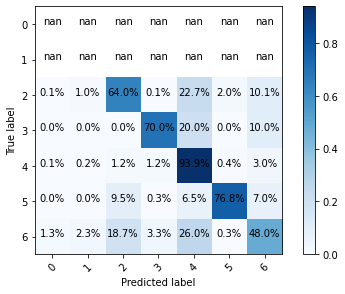

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          fname='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize and cm[i, j] >= 0:
            plt.text(j, i, format(cm[i, j]*100, fmt) + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")    
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(fname, bbox_inches='tight', pad_inches=1)

# Compute confusion matrix
##cnf_matrix = confusion_matrix(y_val_true, y_val_prediction)

#cnf_matrix = confusion_matrix(preds,true_labels)
# cnf_matrix = confusion_matrix(preds, np.argmax(true_labels,axis=-1)) ?????
preds_ = [int(i[0][0] )for i in preds]
trues = [int(i[0] )for i in true_labels]
cnf_matrix = confusion_matrix(preds_, trues)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization',
                      fname=MODEL_NAME + "_" + 'Confusion_matrix_without_normalization')
#plt.savefig("drive/My Drive/Multiclass/tor/ode_const_50_multiclass_tor/ORDER_40e_multiclass_ode_confusion without.png")
#files.download("drive/My Drive/Code-20200822T090227Z-001/Code/ode_const_10_voip_vs_all_tor/without_ode/confusion without no ode.png")

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix',
                      fname=MODEL_NAME + "_" + 'Normalized_confusion_matrix')
#plt.savefig("drive/My Drive/Multiclass/tor/ode_const_50_multiclass_tor/ORDER_40e_multiclass_ode_confusion with.png")
#files.download("drive/My Drive/Code-20200822T090227Z-001/Code/ode_const_10_voip_vs_all_tor/without_ode/confusion with no ode.png")

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(preds_,trues))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.89      0.64      0.74      1580
           3       0.13      0.70      0.22        10
           4       0.85      0.94      0.89      2819
           5       0.86      0.77      0.81       370
           6       0.35      0.48      0.40       300

    accuracy                           0.81      5079
   macro avg       0.44      0.50      0.44      5079
weighted avg       0.83      0.81      0.81      5079



c:\Users\Itay\.conda\envs\envi\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Itay\.conda\envs\envi\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Itay\.conda\envs\envi\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Analyze Predictions Confidence

In [ ]:
from scipy.special import softmax

def eval_scores(model, device, test_loader, loss_function):
    model.eval()
    test_loss = 0
    correct = 0
    preds=[]
    scores = []
    true_labels=[]
    with torch.no_grad():
        for batch_idx,testdata in enumerate(test_loader):
            x,t,target=testdata
        #for x, t, target in test_loader:
            x, t, target = x.to(device), t.to(device), target.to(device)
            output = model(x, t)
            output = torch.reshape(output, (batch_size, num_classes)) ###########
            test_loss += loss_function(output, target).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            preds.append(pred)
            true_labels.append(target)
            correct += pred.eq(target.view_as(pred)).sum().item()
            scores.append(output)

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    scores = softmax(torch.cat(scores).numpy(), axis=1)
    return scores, torch.cat(preds).numpy().squeeze(), torch.cat(true_labels).numpy()

scores, preds, true_labels=eval_scores(model, device, test_loader, loss_function)

In [ ]:
i=0
print("Softmax Scores, pediction score, score of true label, pediction, true_label, correct?")
print(scores[i], max(scores[i]), scores[i][true_labels[i]], preds[i], true_labels[i], preds[i] == true_labels[i])

Softmax Scores, pediction score, score of true label, pediction, true_label, correct?
[1.58e-07 4.17e-05 3.91e-03 6.01e-01 3.96e-01] 0.6005092 0.6005092 3 3 True


In [ ]:
print(np.max(scores, axis=1) > 0.5)

[False  True  True ...  True  True  True]


In [ ]:
from sklearn.metrics import accuracy_score

def calc_accuracy_for_confidence_threshold(scores=scores, preds=preds, true_labels=true_labels, confidence_th=0.5):
  indexes = np.max(scores, axis=1) > confidence_th
  remaining = len(preds[indexes])/len(preds)
  accuracy = accuracy_score(true_labels[indexes], preds[indexes])
  print("For condifence threshold of", confidence_th, ":", len(preds[indexes]), "remaining out of", len(preds), "=", remaining, "achieve accuracy of", accuracy)
  return remaining, accuracy


In [ ]:
ths = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
remainings = []
accuracies = []
for th in ths:
  remaining, accuracy = calc_accuracy_for_confidence_threshold(confidence_th=th)
  remainings.append(remaining)
  accuracies.append(accuracy)

For condifence threshold of 0.2 : 1005 remaining out of 1005 = 1.0 achieve accuracy of 0.7651741293532338
For condifence threshold of 0.3 : 1005 remaining out of 1005 = 1.0 achieve accuracy of 0.7651741293532338
For condifence threshold of 0.4 : 994 remaining out of 1005 = 0.9890547263681592 achieve accuracy of 0.7696177062374245
For condifence threshold of 0.5 : 904 remaining out of 1005 = 0.8995024875621891 achieve accuracy of 0.797566371681416
For condifence threshold of 0.6 : 741 remaining out of 1005 = 0.7373134328358208 achieve accuracy of 0.8434547908232118
For condifence threshold of 0.7 : 587 remaining out of 1005 = 0.5840796019900497 achieve accuracy of 0.8807495741056218
For condifence threshold of 0.8 : 491 remaining out of 1005 = 0.48855721393034823 achieve accuracy of 0.9022403258655805
For condifence threshold of 0.9 : 413 remaining out of 1005 = 0.4109452736318408 achieve accuracy of 0.9176755447941889
For condifence threshold of 0.95 : 359 remaining out of 1005 = 0.357

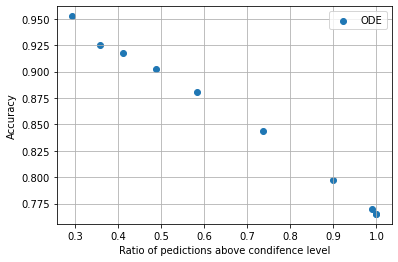

In [ ]:
plt.scatter(remainings, accuracies, label="ODE")
plt.xlabel("Ratio of pedictions above condifence level")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Plot Confusion Matrix for Specific Threshold

In [ ]:
def plot_confusion_matrix_for_confidence_threshold(scores=scores, preds=preds, true_labels=true_labels, confidence_th=0.5):
  indexes = np.max(scores, axis=1) > confidence_th
  remaining = len(preds[indexes])/len(preds)
  accuracy = accuracy_score(true_labels[indexes], preds[indexes])
  print("For condifence threshold of", confidence_th, ":", len(preds[indexes]), "remaining out of", len(preds), "=", remaining, "achieve accuracy of", accuracy)

  cnf_matrix = confusion_matrix(preds[indexes], true_labels[indexes])

  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=class_names,
                        title='Confusion matrix, without normalization',
                        fname=MODEL_NAME + "_" + 'Confusion_matrix_without_normalization' + "_th_" + str(confidence_th).split('.')[1])
  #plt.savefig("drive/My Drive/Multiclass/tor/ode_const_50_multiclass_tor/ORDER_40e_multiclass_ode_confusion without.png")
  #files.download("drive/My Drive/Code-20200822T090227Z-001/Code/ode_const_10_voip_vs_all_tor/without_ode/confusion without no ode.png")

  # Plot normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                        title='Normalized confusion matrix',
                        fname=MODEL_NAME + "_" + 'Normalized_confusion_matrix' + "_th_" + str(confidence_th).split('.')[1])
  #plt.savefig("drive/My Drive/Multiclass/tor/ode_const_50_multiclass_tor/ORDER_40e_multiclass_ode_confusion with.png")
  #files.download("drive/My Drive/Code-20200822T090227Z-001/Code/ode_const_10_voip_vs_all_tor/without_ode/confusion with no ode.png")

  plt.show()

For condifence threshold of 0.7 : 587 remaining out of 1005 = 0.5840796019900497 achieve accuracy of 0.8807495741056218
Confusion matrix, without normalization
[[268   0   0   0   2]
 [  0   6   0   0   0]
 [  0  20  86   0  15]
 [  0   0   0   7   2]
 [  4   8   3  16 150]]
Normalized confusion matrix
[[0.99 0.   0.   0.   0.01]
 [0.   1.   0.   0.   0.  ]
 [0.   0.17 0.71 0.   0.12]
 [0.   0.   0.   0.78 0.22]
 [0.02 0.04 0.02 0.09 0.83]]


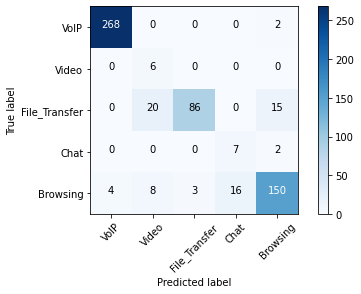

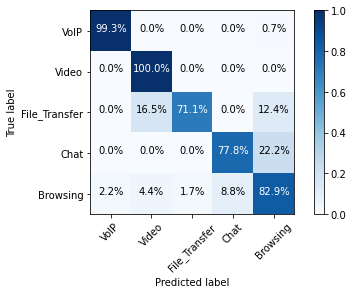

In [ ]:
plot_confusion_matrix_for_confidence_threshold(scores, preds, true_labels, confidence_th=0.7)